In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv('ticketcostx.csv')

In [3]:
data.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 6:20,29/05/19 9:16,Super Fast,38.55,2AC,Promo
1,1,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 7:00,29/05/19 9:32,Passenger Train,53.40,2AC,Promo
2,2,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 7:30,29/05/19 9:51,Passenger Train,47.30,2AC,Promo
3,3,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 8:00,29/05/19 10:32,Super Fast,69.40,1AC,Promo
4,4,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 8:30,29/05/19 11:14,Express Train,NaN,1AC,Promo


In [4]:
data.describe()

,Unnamed: 0,price
count,419.000000,354.000000
mean,209.000000,61.265395
std,121.099133,12.830945
min,0.000000,34.350000
25%,104.500000,49.150000
50%,209.000000,60.300000
75%,313.500000,69.400000
max,418.000000,128.500000


In [5]:
data.isnull().sum()

Unnamed: 0      0
insert_date     0
origin          0
destination     0
start_date      0
end_date        0
train_type      0
price          65
train_class     2
fare            0
dtype: int64

In [6]:
data['price'].fillna(data['price'].mean(), inplace=True)
data = data.dropna(axis=0,how='any')



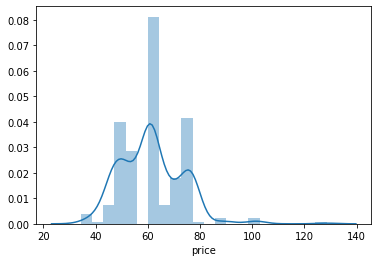

In [7]:
sns.distplot(data['price'])

In [8]:
data['month'] = pd.to_datetime(data.start_date).apply(lambda x: x.month)
data['day'] = pd.to_datetime(data.start_date).apply(lambda x: x.day)
data['dayname'] = pd.to_datetime(data.start_date).apply(lambda x: x.day_name())
data=data.drop('Unnamed: 0',axis=1)

In [9]:
data.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,month,day,dayname
0,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 6:20,29/05/19 9:16,Super Fast,38.550000,2AC,Promo,5,29,Wednesday
1,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 7:00,29/05/19 9:32,Passenger Train,53.400000,2AC,Promo,5,29,Wednesday
2,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 7:30,29/05/19 9:51,Passenger Train,47.300000,2AC,Promo,5,29,Wednesday
3,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 8:00,29/05/19 10:32,Super Fast,69.400000,1AC,Promo,5,29,Wednesday
4,19/04/19 5:31,DELHI-SAFDAR,AGRA CANTT,29/05/19 8:30,29/05/19 11:14,Express Train,61.265395,1AC,Promo,5,29,Wednesday


In [10]:
data['duration'] = (pd.to_datetime(data.end_date)-pd.to_datetime(data.start_date)).apply(lambda x: (x.seconds)/60)
data['route'] = data.origin+data.destination
route_names = {}
i = 1
for route in data.route.unique().tolist():
    route_names["route_"+ "-" + route] = "route"+str(i)
    i = i+1


In [11]:
train_cls=data['train_class']
train_cls.head()

0    2AC
1    2AC
2    2AC
3    1AC
4    1AC
Name: train_class, dtype: object

In [12]:
data.tail()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,month,day,dayname,duration,route
414,19/04/19 5:34,GANDHINAGAR,MANDOR,12/05/19 15:45,12/05/19 18:15,Passenger Train,76.300000,1AC,Flexible,12,5,Thursday,150.0,GANDHINAGARMANDOR
415,19/04/19 5:34,GANDHINAGAR,MANDOR,12/05/19 16:15,12/05/19 18:54,Passenger Train,76.300000,1AC,Flexible,12,5,Thursday,159.0,GANDHINAGARMANDOR
416,19/04/19 5:34,GANDHINAGAR,MANDOR,12/05/19 16:45,12/05/19 19:17,Passenger Train,61.265395,1AC,Flexible,12,5,Thursday,152.0,GANDHINAGARMANDOR
417,19/04/19 5:34,GANDHINAGAR,MANDOR,12/05/19 17:45,12/05/19 20:17,Passenger Train,76.300000,1AC,Flexible,12,5,Thursday,152.0,GANDHINAGARMANDOR
418,19/04/19 5:34,GANDHINAGAR,MANDOR,12/05/19 18:45,12/05/19 21:17,Passenger Train,76.300000,1AC,Flexible,12,5,Thursday,152.0,GANDHINAGARMANDOR


In [13]:
data['duration'].fillna(data['duration'].mean(), inplace=True)


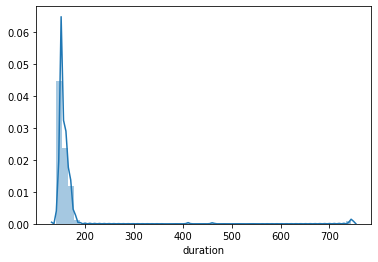

In [14]:
sns.distplot(data['duration'])

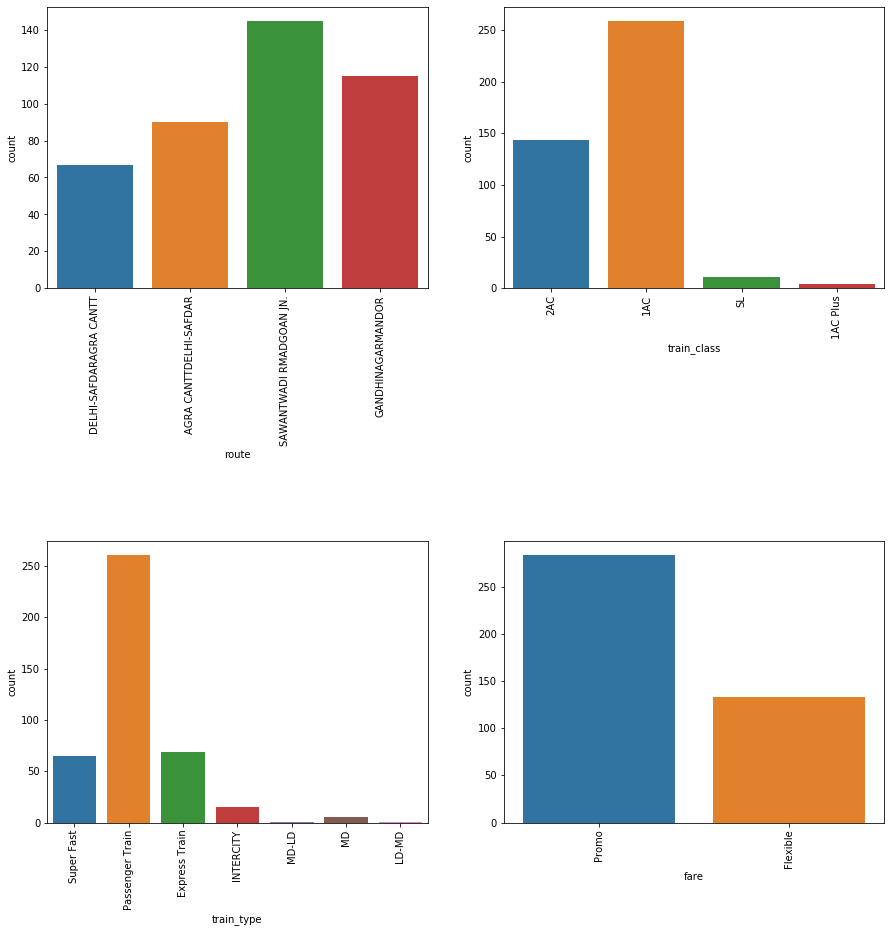

In [15]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
_ = sns.countplot(x=data.route,ax=axs[0,0]).set_xticklabels(rotation=90,labels=data.route.unique())
_ = sns.countplot(x=data.train_class,ax=axs[0,1]).set_xticklabels(rotation=90,labels=data.train_class.unique())
_ = sns.countplot(x=data.train_type,ax=axs[1,0]).set_xticklabels(rotation=90,labels=data.train_type.unique())
_ = sns.countplot(x=data.fare,ax=axs[1,1]).set_xticklabels(rotation=90,labels=data.fare.unique())
fig.subplots_adjust(hspace=.9)

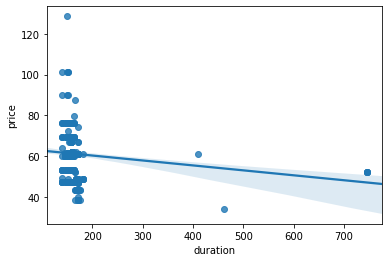

In [16]:
sns.regplot(x='duration',y='price',data=data)

<Figure size 2160x720 with 0 Axes>

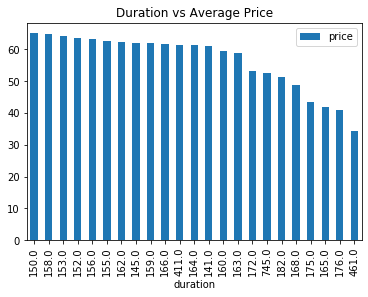

In [17]:
plt.figure(figsize=(30,10))

df = pd.DataFrame(data.groupby(['duration'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Duration vs Average Price')
plt.show()

<Figure size 2160x720 with 0 Axes>

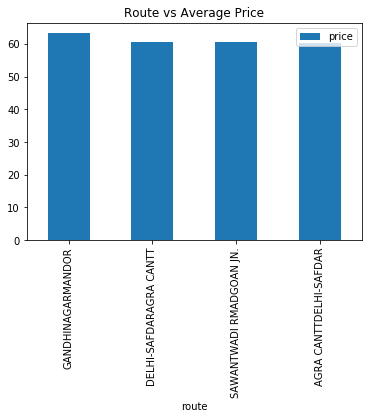

In [18]:
plt.figure(figsize=(30,10))

df = pd.DataFrame(data.groupby(['route'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Route vs Average Price')
plt.show()

<Figure size 2160x720 with 0 Axes>

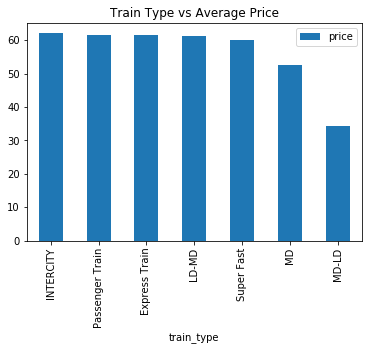

In [19]:
plt.figure(figsize=(30,10))

df = pd.DataFrame(data.groupby(['train_type'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Train Type vs Average Price')
plt.show()

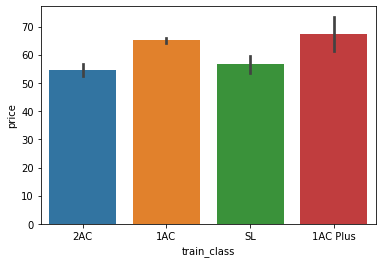

In [20]:
sns.barplot(x='train_class',y='price',data=data)

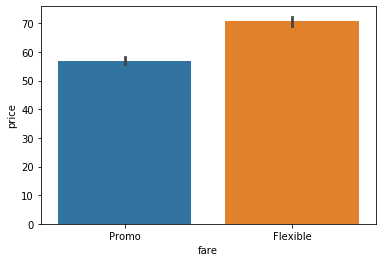

In [21]:
sns.barplot(x='fare',y='price',data=data)

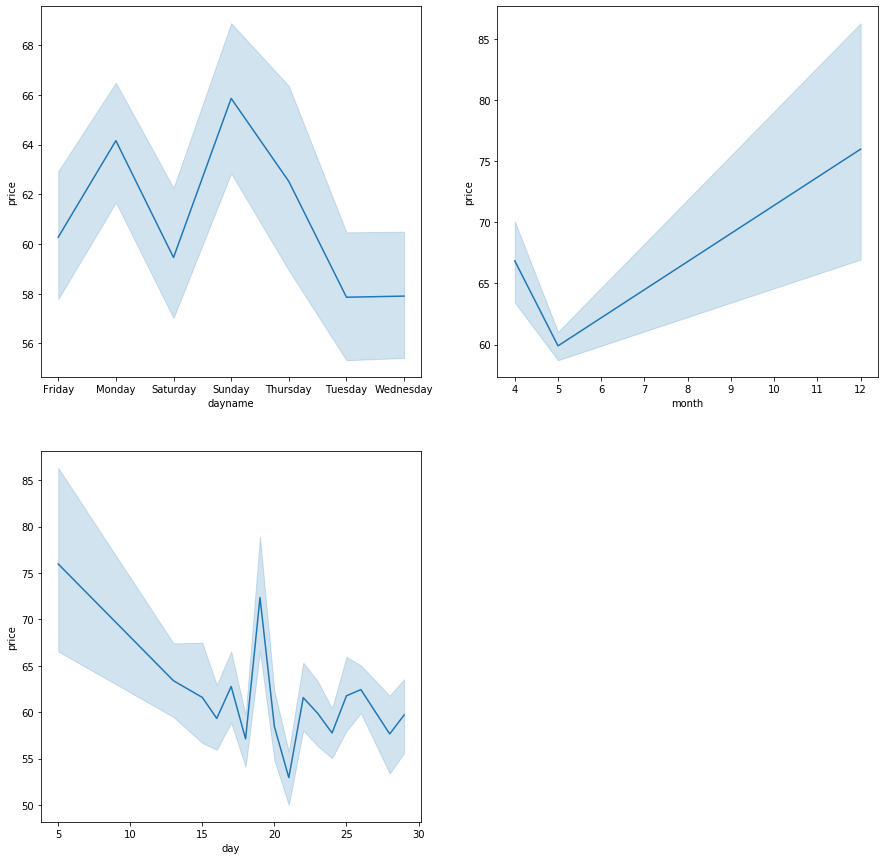

In [22]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
_ = sns.lineplot(x='dayname',y='price',data=data,ax=axs[0,0])
_ = sns.lineplot(x='month',y='price',data=data,ax=axs[0,1])
_ = sns.lineplot(x='day',y='price',data=data,ax=axs[1,0])
fig.delaxes(axs[1,1])

In [23]:
data['route'].unique()

array(['DELHI-SAFDARAGRA CANTT', 'AGRA CANTTDELHI-SAFDAR',
       'SAWANTWADI RMADGOAN JN.', 'GANDHINAGARMANDOR'], dtype=object)

In [24]:
sig_col=['train_type','train_class','fare','month','day','dayname','duration','route']
X=data[sig_col]
Y=data['price']

In [25]:
#For days

def convert_to_int(word):
    word_dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday': 6, 'Sunday':7,0:0}
    return word_dict[word]

X['dayname'] = X['dayname'].apply(lambda x : convert_to_int(x))

In [26]:
#For train class

def convert_to_int(word):
    word_dict = {'1AC':1, '2AC':2, 'SL':3, '1AC Plus':4,0:0}
    return word_dict[word]

X['train_class'] = X['train_class'].apply(lambda x : convert_to_int(x))

In [27]:
#For train type

def convert_to_int(word):
    word_dict = {'Super Fast':1, 'Passenger Train':2, 'Express Train':3, 'INTERCITY':4, 'MD-LD':5, 'MD': 6, 'LD-MD':7,0:0}
    return word_dict[word]

X['train_type'] = X['train_type'].apply(lambda x : convert_to_int(x))

In [28]:
#For fare
def convert_to_int(word):
    word_dict = {'Promo':1, 'Flexible':2,0:0}
    return word_dict[word]

X['fare'] = X['fare'].apply(lambda x : convert_to_int(x))

In [29]:
#For Route

def convert_to_int(word):
    word_dict = {'DELHI-SAFDARAGRA CANTT':1, 'AGRA CANTTDELHI-SAFDAR':2, 'SAWANTWADI RMADGOAN JN.':3, 'GANDHINAGARMANDOR':4,0:0}
    return word_dict[word]

X['route'] = X['route'].apply(lambda x : convert_to_int(x))

In [30]:
#Training using Random Forest
'''
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.4,random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_test,y_test)
with open("ticketprices1.pickle", "wb") as f:
            pickle.dump(linear, f)
pickle_in = open("ticketprices1.pickle", "rb")
regressor = pickle.load(pickle_in)
acc=regressor.score(x_test, y_test)
acc
'''

'\nx_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.4,random_state=0)\nfrom sklearn.ensemble import RandomForestRegressor\nregressor=RandomForestRegressor(n_estimators=10,random_state=0)\nregressor.fit(x_test,y_test)\nwith open("ticketprices1.pickle", "wb") as f:\n            pickle.dump(linear, f)\npickle_in = open("ticketprices1.pickle", "rb")\nregressor = pickle.load(pickle_in)\nacc=regressor.score(x_test, y_test)\nacc\n'

In [31]:

# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc1 = linear.score(x_test, y_test)
   # print("Accuracy: " + str(acc))

    if acc1 > best:
        best = acc1
        with open("ticketprices.pickle", "wb") as f:
            pickle.dump(linear, f)


In [32]:
pickle_in = open("ticketprices.pickle", "rb")
linear = pickle.load(pickle_in)
acc1


0.4115538009072959

In [33]:
predicted= linear.predict(x_test)
x_test1=np.array(x_test)
y_test1=np.array(y_test)

In [34]:
#Comparing predicitons with actual results
for w in range(21):
    print(y_test1[w],' ',x_test1[w])
    print("{:.2f}".format(predicted[w]))
    print()

53.4   [  2.   2.   1.   5.  20.   1. 152.   3.]
53.48

47.3   [  2.   2.   1.   5.  22.   3. 141.   3.]
54.39

76.3   [  2.   1.   2.   5.  19.   7. 150.   3.]
75.40

38.55   [  1.   2.   1.   5.  23.   4. 172.   3.]
53.37

69.4   [  2.   1.   1.   5.  20.   1. 160.   3.]
55.80

61.26539548022588   [  3.   2.   1.  12.   5.   4. 158.   4.]
66.35

47.3   [  2.   2.   1.   5.  21.   2. 152.   3.]
53.72

60.3   [  2.   1.   1.   5.  24.   5. 152.   2.]
59.29

60.3   [  2.   1.   1.   5.  25.   6. 150.   2.]
59.61

60.3   [  2.   1.   1.   5.  20.   1. 152.   3.]
56.11

53.4   [  2.   2.   1.   5.  26.   7. 141.   1.]
59.79

76.3   [  2.   1.   2.   4.  22.   1. 163.   3.]
67.04

60.3   [  2.   1.   1.   5.  22.   3. 152.   3.]
56.59

60.3   [  2.   1.   1.   5.  13.   1. 152.   4.]
58.60

52.5   [  6.   3.   2.  12.   5.   4. 745.   4.]
53.97

61.26539548022588   [  2.   1.   2.  12.   5.   4. 152.   4.]
82.22

60.3   [  2.   1.   1.   5.  20.   1. 152.   3.]
56.11

53.4   [  2.   2.   1

NEW INPUTS

LENGEND :

1.TRAIN CLASS:

'1AC':1, '2AC':2, 'SL':3 , '1AC PLUS' :4

2.TRAIN TYPE:

'Super Fast':1, 'Passenger Train':2, 'Express Train':3, 'INTERCITY':4, 'MD-LD':5, 'MD': 6, 'LD-MD':7

3.FARE :

'Promo':1, 'Flexible':2

4.MONTH :

NUMBER OF THE MONTH


4.DAY NAME:

'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday': 6, 'Sunday':7

5.ROUTE:

'DELHI-SAFDARAGRA CANTT':1, 'AGRA CANTTDELHI-SAFDAR':2, 'SAWANTWADI RMADGOAN JN.':3, 'GANDHINAGARMANDOR':4


In [50]:
train_type=1
train_class=3
fare=2
month=5
day=20
dayname=5
duration=160
route=3

In [51]:
inputt=[train_type,train_class,fare,month,day,dayname,duration,route]
inputt = np.asarray(inputt)
inputt.reshape(-1,1)

array([[  1],
       [  3],
       [  2],
       [  5],
       [ 20],
       [  5],
       [160],
       [  3]])

In [52]:
 print('*********************************************TRAIN TICKET COST PREDICTION*************************************')
print()
print ('Predicted Ticket Price: \n', "Rs.",linear.predict([inputt])*4)

*********************************************TRAIN TICKET COST PREDICTION*************************************

Predicted Ticket Price: 
 Rs. [268.80379917]
